In [1]:
%matplotlib notebook

# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read CSVs into dataframes
data_file = "resources/MHSS-2010-data.csv"
data_pd = pd.read_csv(data_file, sep='\t')
# data_pd.head()

states_file = "resources/state_census_codes.csv"
states_id = pd.read_csv(states_file)
states_id.head()

,STFIPS,State,Region
0,1,ALABAMA,South
1,2,ALASKA,West
2,4,ARIZONA,West
3,5,ARKANSAS,South
4,6,CALIFORNIA,West


In [3]:
# create a reduced dataframe from Mental Health Services Survey file
mh_services = data_pd[["CASEID","STFIPS", "Ownership", "MHSuicide"]]

mh_services.head(5)

,CASEID,STFIPS,Ownership,MHSuicide
0,1,21,2,0
1,2,47,3,0
2,3,47,2,1
3,4,17,2,0
4,5,8,2,1


In [4]:
# create merged dataframe to add in states and regions
mhs = pd.merge(mh_services, states_id, on = "STFIPS")
mhs.head()

,CASEID,STFIPS,Ownership,MHSuicide,State,Region
0,1,21,2,0,KENTUCKY,South
1,58,21,3,1,KENTUCKY,South
2,118,21,2,1,KENTUCKY,South
3,191,21,2,1,KENTUCKY,South
4,198,21,8,1,KENTUCKY,South


In [5]:
# Convert response codes to values for facility ownership and suicide prevention program
mhs["MHSuicide"] = mhs["MHSuicide"].replace({0:"No",1:"Yes",(-1):"Unknown"})

mhs["Ownership"] = mhs["Ownership"].replace({1:"Private for-profit",
                                             2:"Private non-profit",
                                             3:"State or Regional Government", 
                                             5:"State or Regional Government",
                                             6:"State or Regional Government", 
                                             7:"U.S. Veterans Affairs", 
                                             8:"Other",
                                             9:"Other"
                                            }
                                           )

# convert formatting of States and change to abbreviations
mhs["State"] = mhs["State"].str.lower()
mhs["State"] = mhs["State"].str.title()

mhs["State"] = mhs["State"].replace({'Alabama': 'AL',
                                    'Alaska': 'AK',
                                    'Arizona': 'AZ',
                                    'Arkansas': 'AR',
                                    'California': 'CA',
                                    'Colorado': 'CO',
                                    'Connecticut': 'CT',
                                    'Delaware': 'DE',
                                    'Dist_Of_Columbia': 'DC',
                                    'Florida': 'FL',
                                    'Georgia': 'GA',
                                    'Hawaii': 'HI',
                                    'Idaho': 'ID',
                                    'Illinois': 'IL',
                                    'Indiana': 'IN',
                                    'Iowa': 'IA',
                                    'Kansas': 'KS',
                                    'Kentucky': 'KY',
                                    'Louisiana': 'LA',
                                    'Maine': 'ME',
                                    'Maryland': 'MD',
                                    'Massachusetts': 'MA',
                                    'Michigan': 'MI',
                                    'Minnesota': 'MN',
                                    'Mississippi': 'MS',
                                    'Missouri': 'MO',
                                    'Montana': 'MT',
                                    'Nebraska': 'NE',
                                    'Nevada': 'NV',
                                    'New_Hampshire': 'NH',
                                    'New_Jersey': 'NJ',
                                    'New_Mexico': 'NM',
                                    'New_York': 'NY',
                                    'North_Carolina': 'NC',
                                    'North_Dakota': 'ND',
                                    'Ohio': 'OH',
                                    'Oklahoma': 'OK',
                                    'Oregon': 'OR',
                                    'Pennsylvania': 'PA',
                                    'Rhode_Island': 'RI',
                                    'South_Carolina': 'SC',
                                    'South_Dakota': 'SD',
                                    'Tennessee': 'TN',
                                    'Texas': 'TX',
                                    'Utah': 'UT',
                                    'Vermont': 'VT',
                                    'Virginia': 'VA',
                                    'Washington': 'WA',
                                    'West_Virginia': 'WV',
                                    'Wisconsin': 'WI',
                                    'Wyoming': 'WY'})

# reorganize columns and remove STFIPS column
mhs = mhs[["CASEID", "Region", "State", "MHSuicide", "Ownership"]]
mhs.sample(10)

# check column counts
# mhs.count()

,CASEID,Region,State,MHSuicide,Ownership
6337,5881,Midwest,IN,Unknown,Private non-profit
7529,6586,Midwest,MN,No,Private non-profit
7838,8415,West,OR,Yes,State or Regional Government
437,414,Midwest,IL,Yes,Private non-profit
145,6471,South,KY,Yes,Private non-profit
2843,10362,West,CA,No,Private non-profit
6147,9709,South,FL,Yes,Private non-profit
2623,7663,West,CA,No,Private non-profit
8842,1176,Midwest,MI,Unknown,U.S. Veterans Affairs
4697,9874,South,MD,Unknown,Private non-profit


In [6]:
# create data frames for each region

mhs_south = mhs.loc[mhs["Region"] == "South", :]
# mhs_south.sample(10)

mhs_northeast = mhs.loc[mhs["Region"] == "Northeast", :]
# mhs_northeast.sample(10)

mhs_midwest = mhs.loc[mhs["Region"] == "Midwest", :]
# mhs_midwest.sample(10)

mhs_west = mhs.loc[mhs["Region"] == "West", :]
# mhs_west.sample(10)

## Mental Health Service Providers with Suicide Prevention Programs

<IPython.core.display.Javascript object>


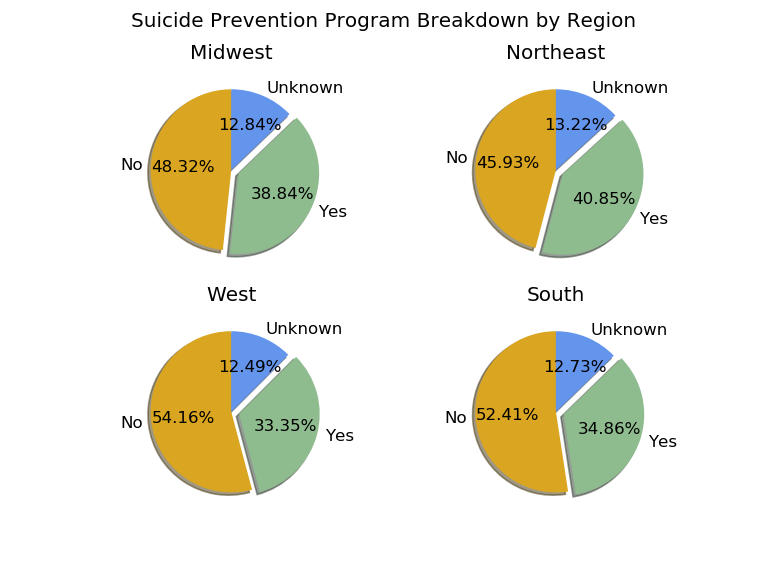

In [7]:
# reduced data frames for each region and grab data from column "MHSuicide"
mhs_w_suicide = mhs_west[["MHSuicide", "State"]]
suicide_prev_w = mhs_w_suicide["MHSuicide"].value_counts()

mhs_mw_suicide = mhs_midwest[["MHSuicide", "State"]]
suicide_prev_mw = mhs_mw_suicide["MHSuicide"].value_counts()

mhs_ne_suicide = mhs_northeast[["MHSuicide", "State"]]
suicide_prev_ne = mhs_ne_suicide["MHSuicide"].value_counts()

mhs_s_suicide = mhs_south[["MHSuicide", "State"]]
suicide_prev_s = mhs_s_suicide["MHSuicide"].value_counts()

# set up pie charts for each region as subplots on one figure
labels = mhs["MHSuicide"].unique()
explode = (0,0.1,0)
colors = ["goldenrod", "darkseagreen", "cornflowerblue"]

# midwest pie chart
plt.subplot(221)
plt.pie(suicide_prev_mw, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", 
       shadow=True, startangle=90)
plt.title("Midwest")

# northeast pie chart
plt.subplot(222)
plt.pie(suicide_prev_ne, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", 
       shadow=True, startangle=90)
plt.title("Northeast")

# west pie chart
plt.subplot(223)
plt.pie(suicide_prev_w, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", 
       shadow=True, startangle=90)
plt.title("West")

# south pie chart
plt.subplot(224)
plt.pie(suicide_prev_s, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", 
       shadow=True, startangle=90)
plt.title("South")

# set up title for overall figure, save to file, and display
plt.suptitle("Suicide Prevention Program Breakdown by Region")

plt.savefig("output/SuicidePreventionServices_Regions.png")
plt.show()

## Ownership Type of Mental Health Service Providers

<IPython.core.display.Javascript object>


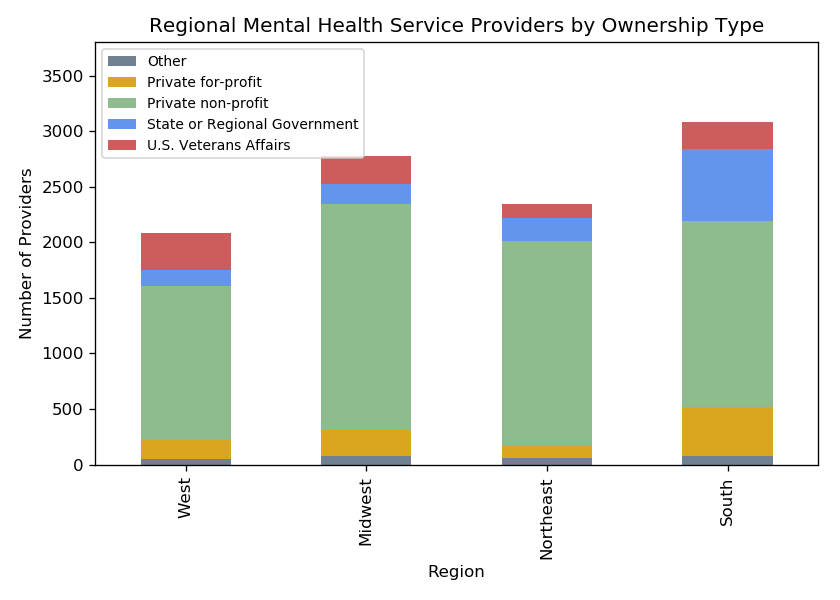

In [8]:
# set up data to use in bar chart
type_west = mhs_west["Ownership"].value_counts()

type_midwest = mhs_midwest["Ownership"].value_counts()

type_northeast = mhs_northeast["Ownership"].value_counts()

type_south = mhs_south["Ownership"].value_counts()

types_all = pd.DataFrame({"West":type_west, "Midwest":type_midwest, "Northeast": type_northeast, 
                               "South": type_south}).T

# create bar chart
types_all.plot(kind="bar", figsize=(7,5), stacked=True, color=("slategrey", "goldenrod", 
                                                                "darkseagreen", "cornflowerblue", 
                                                                "indianred"
                                                                ))
plt.title("Regional Mental Health Service Providers by Ownership Type")
plt.xlabel("Region")
plt.ylabel("Number of Providers")
plt.ylim(0,3800)
plt.legend(loc='upper left', fontsize='small')
plt.tight_layout()
plt.savefig("output/MHS_OwnershipType_Regions.png")
plt.show()

